# Crop Production Analysis
Agriculture is one of the most practiced activity in the world giving a huge contribution to various economies.As a data science student at Jenga School i have used the following datasets to visualize crop production in kenya and the rest of Eastern Africa and my project will answer the following questions as stated below step by step.

This datasets were found at http://www.fao.org/faostat/en/#data/QC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Loading Data

In [2]:
data = pd.read_csv("FAOSTAT_data_6-28-2021 Production.csv")
Data = pd.read_csv("FAOSTAT_data_6-28-2021 (1) Harvest.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   2157 non-null   object 
 1   Area     2157 non-null   object 
 2   Element  2157 non-null   object 
 3   Crop     2157 non-null   object 
 4   Year     2157 non-null   int64  
 5   Unit     2157 non-null   object 
 6   Value    2017 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 118.1+ KB


In [4]:
data.describe()

,Year,Value
count,2157.000000,2.017000e+03
mean,2017.501623,3.811324e+05
std,1.118085,1.044898e+06
min,2016.000000,0.000000e+00
25%,2017.000000,3.169000e+03
50%,2018.000000,2.500000e+04
75%,2019.000000,1.934610e+05
max,2019.000000,1.048819e+07


# Question 1: Which Country had the most production Volume in Eastern Africa

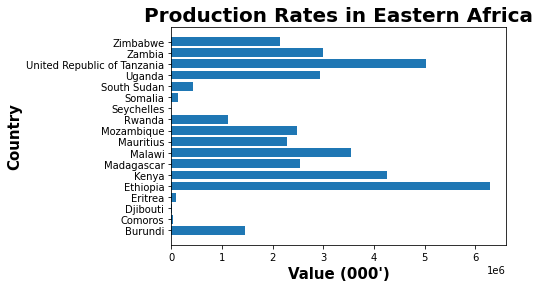

In [5]:
bars=plt.barh(data.Area, data.Value / 10*6)
plt.title("Production Rates in Eastern Africa", fontsize=20, fontweight="bold")
plt.xlabel("Value (000')",fontsize=15, fontweight="bold")
plt.ylabel("Country",fontsize=15, fontweight="bold")
plt.rcParams["figure.figsize"] = (10,6)
data.sort_values("Value", inplace= True)
bars[5].set_hatch("/")
plt.show()

# Question 2: What Is The Total Number of Tonnes of Crops Procuced In the 4years

In [6]:
Production = (data["Element"] == "Production")
data.loc[Production]["Value"].sum()

768743974.0

# Question 3: Which Is The Year With the Most Production and Area Harvested  Eastern Africa.

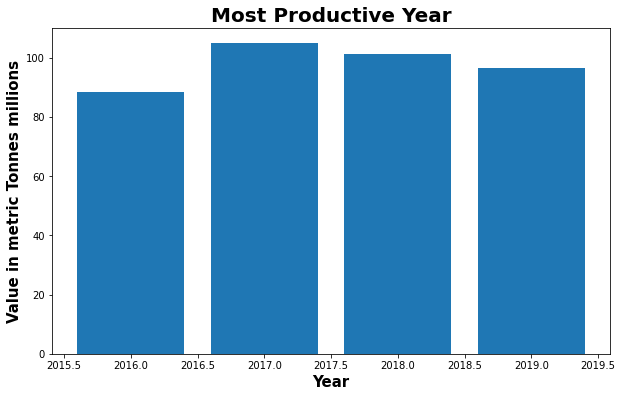

In [91]:
### PRODUCTION
w=0.4
plt.bar(data.Year, data.Value / 10**5)
plt.title("Most Productive Year",fontsize=20, fontweight="bold")
plt.xlabel("Year",fontsize=15, fontweight="bold")
plt.ylabel("Value in metric Tonnes millions",fontsize=15, fontweight="bold")
plt.show()


In [8]:
### Area Harvested

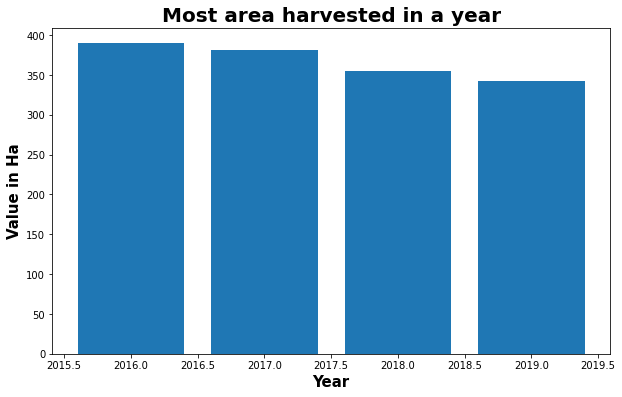

In [9]:
plt.bar(Data.Year, Data.Value / 10**4)
plt.title("Most area harvested in a year",fontsize=20, fontweight="bold")
plt.xlabel("Year",fontsize=15, fontweight="bold")
plt.ylabel("Value in Ha",fontsize=15, fontweight="bold")
plt.show()


# Question 4: Production Data Kenya

In [50]:
Kenya = (data["Area"] == "Kenya") & (data["Element"] == "Production")


In [51]:
data.loc[Kenya]

,Domain,Area,Element,Crop,Year,Unit,Value
497,Crops,Kenya,Production,Ginger,2018,tonnes,15.0
496,Crops,Kenya,Production,Ginger,2017,tonnes,84.0
548,Crops,Kenya,Production,"Pyrethrum, dried",2017,tonnes,166.0
549,Crops,Kenya,Production,"Pyrethrum, dried",2018,tonnes,212.0
550,Crops,Kenya,Production,"Pyrethrum, dried",2019,tonnes,217.0
...,...,...,...,...,...,...,...
513,Crops,Kenya,Production,Maize,2018,tonnes,4013777.0
578,Crops,Kenya,Production,Sugar cane,2019,tonnes,4606100.0
576,Crops,Kenya,Production,Sugar cane,2017,tonnes,4751605.0
577,Crops,Kenya,Production,Sugar cane,2018,tonnes,5262157.0


In [12]:
data.loc[Kenya,["Value"]].sum()
### Figure is in Tonnes

Value    80779264.0
dtype: float64

## Most Produced Crop in Kenya

In [13]:
Per_Area = data.groupby(["Area","Crop"])["Value"].sum()

In [14]:
Per_Area["Kenya"].sort_values(ascending=False)

Crop
Sugar cane                            21714481.0
Maize                                 14435777.0
Potatoes                               6726128.0
Bananas                                5852696.0
Cassava                                3278256.0
Sweet potatoes                         3231419.0
Beans, dry                             3158160.0
Cabbages and other brassicas           3044058.0
Mangoes, mangosteens, guavas           2909991.0
Vegetables, fresh nes                  2620173.0
Tomatoes                               2059319.0
Tea                                    1864697.0
Pineapples                             1251772.0
Wheat                                  1082700.0
Avocados                                992601.0
Carrots and turnips                     879097.0
Sorghum                                 738000.0
Watermelons                             734192.0
Cow peas, dry                           710251.0
Spinach                                 554434.0
Rice, paddy    

Text(0, 0.5, 'Crop')

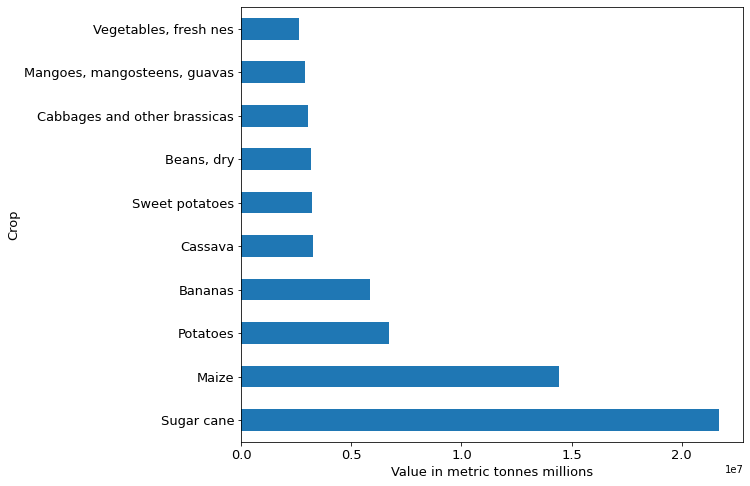

In [85]:
Per_Area["Kenya"].sort_values(ascending=False).head(10).plot.barh(figsize = (9,8) ,fontsize=13)
plt.xlabel("Value in metric tonnes millions",fontsize=13)
plt.ylabel("Crop",fontsize=13)
##This is a graphical representtion of the data.

## Production of Sugarcane and Maize in Kenya

In [71]:
SugarCane = (data["Area"] == "Kenya") & (data["Element"] == "Production") & (data["Crop"] == "Sugar cane")

In [72]:
data.loc[SugarCane]


,Domain,Area,Element,Crop,Year,Unit,Value
578,Crops,Kenya,Production,Sugar cane,2019,tonnes,4606100.0
576,Crops,Kenya,Production,Sugar cane,2017,tonnes,4751605.0
577,Crops,Kenya,Production,Sugar cane,2018,tonnes,5262157.0
575,Crops,Kenya,Production,Sugar cane,2016,tonnes,7094619.0


In [68]:
Maize = (data["Area"] == "Kenya") & (data["Element"] == "Production") & (data["Crop"] == "Maize")

In [69]:
data.loc[Maize]

,Domain,Area,Element,Crop,Year,Unit,Value
512,Crops,Kenya,Production,Maize,2017,tonnes,3186000.0
511,Crops,Kenya,Production,Maize,2016,tonnes,3339000.0
514,Crops,Kenya,Production,Maize,2019,tonnes,3897000.0
513,Crops,Kenya,Production,Maize,2018,tonnes,4013777.0


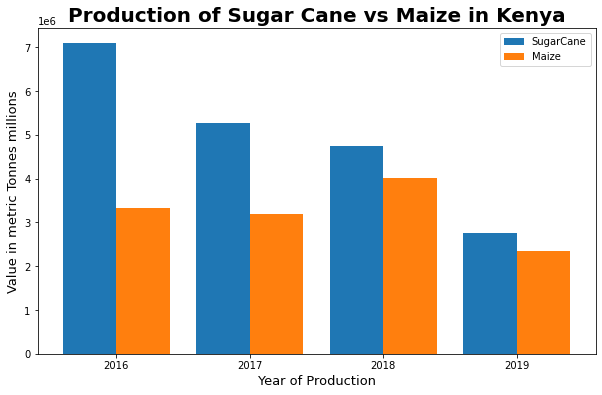

In [89]:
w = 0.4
SugarCane = [7094619,5262157,4751605,4606100 / 10*6]
Maize = [3339000,3186000,4013777,3897000 / 10*6]
x = ["2016","2017","2018","2019"]
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
plt.bar(bar1 ,SugarCane,w,label="SugarCane")
plt.bar(bar2 ,Maize,w,label="Maize")
plt.title("Production of Sugar Cane vs Maize in Kenya",fontweight="bold",fontsize="20")
plt.xlabel("Year of Production",fontsize="13")
plt.ylabel("Value in metric Tonnes millions",fontsize="13")
plt.legend()
plt.xticks(bar1+w/2,x)
plt.show()

In [84]:
print("Sugar cane was the most produced crop in kenya but there is a steady decline of its production within the four years while maize has a high production in 2018")

Sugar cane was the most produced crop in kenya but there is a steady decline of its production within the four years while maize has a high production in 2018


# Question 5: Production Data Eastern Africa

In [17]:
Production = (data["Element"] == "Production") 
##This filter focuses on the production part of it

In [18]:
data.loc [Production, ["Crop", "Year","Value"]].value_counts().head(50)


Crop              Year  Value    
Castor oil seed   2018  3000.0       2
                  2017  3000.0       2
                  2016  3000.0       2
Rice, paddy       2016  3815849.0    1
                        133000.0     1
                        136001.0     1
                        146633.0     1
                        214910.0     1
                        2229000.0    1
                  2017  160.0        1
                  2016  101510.0     1
                  2017  1433.0       1
                        1532.0       1
                        32970.0      1
                        38423.0      1
                        81198.0      1
                  2016  110544.0     1
                        83757.0      1
                  2017  108958.0     1
                  2016  31700.0      1
                        26675.0      1
                        1475.0       1
                        1375.0       1
                        352.0        1
Pyrethrum, dried  2019  7347.0

In [19]:
data.loc[Production, ["Value"]].sum()
### Figure is in Tonnes

Value    768743974.0
dtype: float64

## Most Produced Crops in Eastern Africa

In [20]:
data.groupby(["Crop"])["Value"].sum().sort_values(ascending=False)

Crop
Sugar cane                            143546660.0
Maize                                 127014312.0
Cassava                               119025702.0
Sweet potatoes                         70975541.0
Bananas                                40534964.0
Rice, paddy                            31896437.0
Sorghum                                31333412.0
Vegetables, fresh nes                  27863359.0
Potatoes                               26434514.0
Wheat                                  21867568.0
Beans, dry                             19641515.0
Mangoes, mangosteens, guavas           12859747.0
Tomatoes                               10077415.0
Barley                                  9208005.0
Groundnuts, with shell                  7619845.0
Millet                                  7397885.0
Cabbages and other brassicas            6197123.0
Sunflower seed                          5696768.0
Onions, dry                             5538374.0
Pineapples                              49076

Text(0, 0.5, 'Crops')

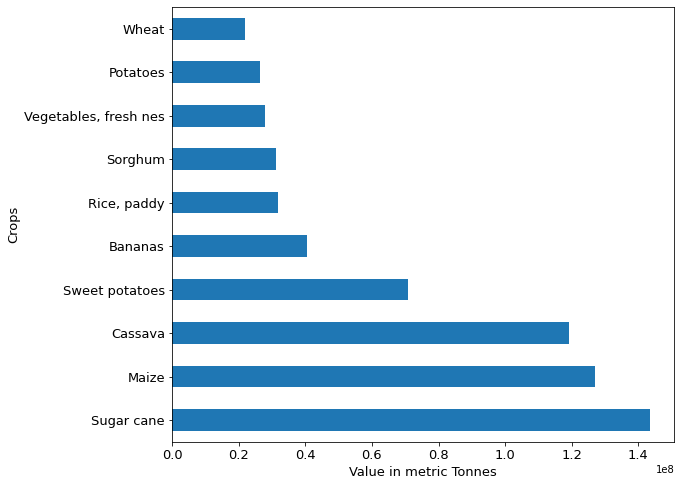

In [45]:
data.groupby(["Crop"])["Value"].sum().sort_values(ascending=False).head(10).plot.barh(figsize = (9,8),fontsize=13)
plt.xlabel("Value in metric Tonnes",fontsize=13)
plt.ylabel("Crops",fontsize=13)

In [22]:
print("The most Produced crops were: Sugar cane, Maize and Cassava in that order")

The most Produced crops were: Sugar cane, Maize and Cassava in that order


# Question 6 : Production Comparison Between Kenya, Uganda and Tanzania

In [23]:
Kenya = data[data.Area == "Kenya"].sum()["Value"]

In [24]:
Uganda = data[data.Area == "Uganda"].sum()["Value"]

In [25]:
Tanzania = data[data.Area == "United Republic of Tanzania"].sum()["Value"]

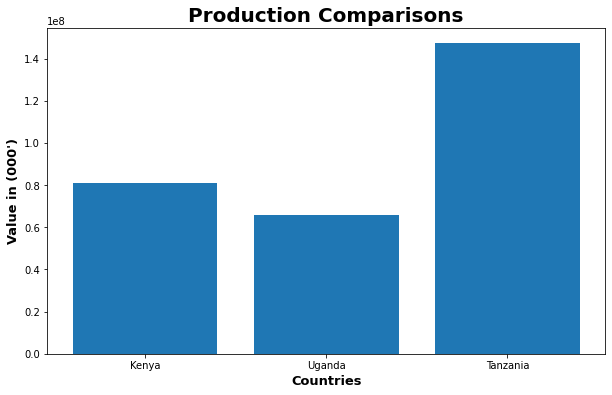

In [26]:
x=[Kenya,Uganda,Tanzania]
y=["Kenya","Uganda","Tanzania"]
plt.bar(y,x)
plt.title("Production Comparisons",fontsize=20, fontweight="bold")
plt.xlabel("Countries",fontsize=13, fontweight="bold")
plt.ylabel("Value in (000')",fontsize=13, fontweight="bold")
plt.show()

In [27]:
print("From the Bar graph we can conclude that Tanzania is the country with the highest produce")

From the Bar graph we can conclude that Tanzania is the country with the highest produce


# Question 7 : Production Percentage rates of six EA Countries

In [28]:
Production_Values = [65585100,147269255,80779264,25615403,126331524,23273647]
Production_Labels = ["Uganda","Tanzania","Kenya","Burundi","Ethiopia","Zimbabwe"]

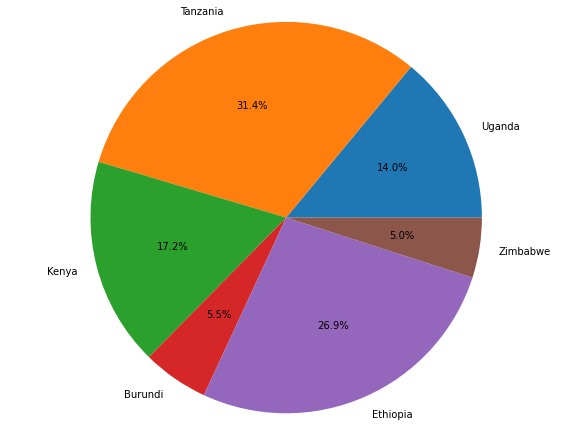

In [29]:
plt.axis("equal")
plt.pie(Production_Values,labels=Production_Labels,radius=1.5,autopct="%0.1f%%")
plt.show()

# Question 8 : Production of Maize in Eastern Africa

In [30]:
Maize = (data["Crop"] == "Maize") & (data["Area"] == "Zambia")

In [31]:
data.loc[Maize, ["Value"]].sum()

Value    10878897.0
dtype: float64

In [32]:
Maize_Values =[14435777,4381488,24754914,10462241,1033406,39090562,11561591,10878897,296000,1564182]
Country_Values = ["Kenya","Zimbabwe","Tanzania","Uganda","Burundi","Ethiopia","Malawi","Zambia","Somalia","Rwanda"]

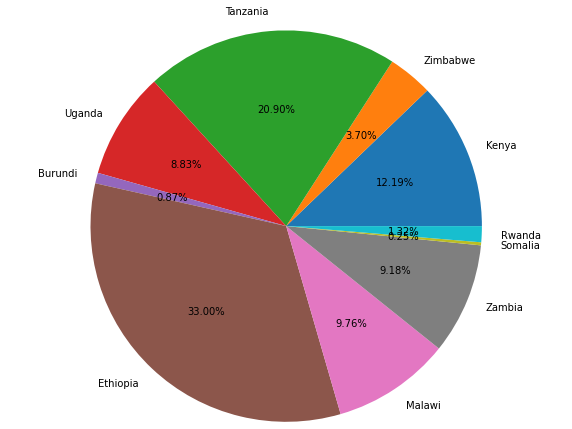

In [33]:
plt.axis("Equal")
plt.pie(Maize_Values,labels=Country_Values,radius=1.5,autopct="%0.2f%%")
plt.show()

In [34]:
print("From the Pie chart we can conclude that Ethiopia was the highest producer of maize followed by Tanzania then Kenya")

From the Pie chart we can conclude that Ethiopia was the highest producer of maize followed by Tanzania then Kenya


# Question 9 : Production of Tea in 6 East African Countries

In [35]:
Tea = (data["Crop"] == "Tea") & (data["Area"] == "Kenya")

In [36]:
data.loc[Tea, ["Value"]].sum()

Value    1864697.0
dtype: float64

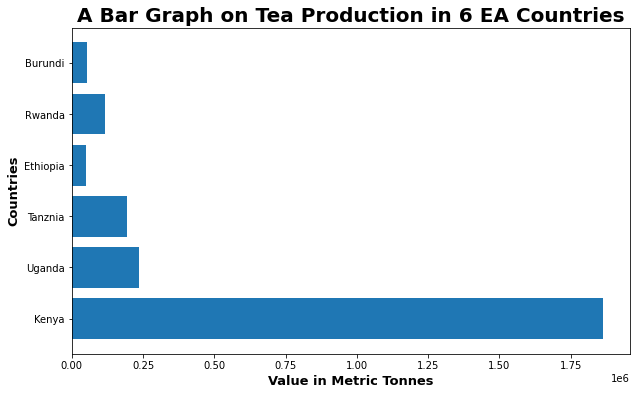

In [94]:
x = [1864697,234407,192654,48944,116120,86108 / 10*6]
y = ["Kenya","Uganda","Tanznia","Ethiopia","Rwanda","Burundi"]
plt.barh(y,x)
plt.title("A Bar Graph on Tea Production in 6 EA Countries",fontsize=20, fontweight="bold")
plt.xlabel("Value in Metric Tonnes",fontsize=13, fontweight="bold")
plt.ylabel("Countries",fontsize=13, fontweight="bold")
plt.show()

In [38]:
print("Kenya was the highest producer of tea in the selected countries")

Kenya was the highest producer of tea in the selected countries


# Question 10 : Amount of land Harvested in 'Ha'

In [39]:
Harvest = (Data["Element"] == "Area harvested")
### propotion of land harvested.

In [40]:
Data.loc[Harvest]["Value"].sum()

221783078.0

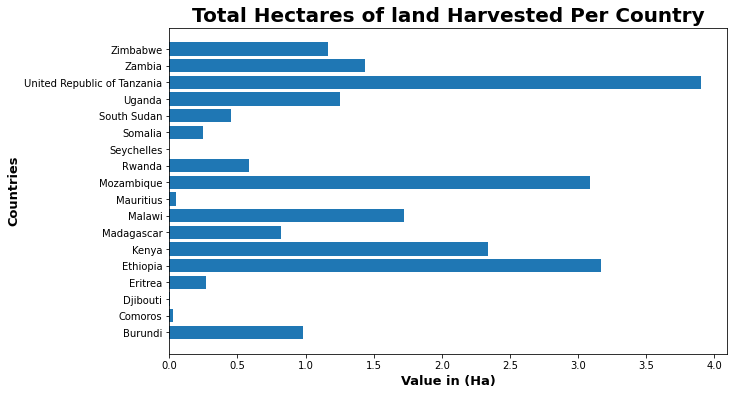

In [41]:
plt.barh(Data.Area, Data.Value/ 10**6)
plt.title("Total Hectares of land Harvested Per Country",fontsize=20, fontweight="bold")
plt.xlabel("Value in (Ha)",fontsize=13, fontweight="bold")
plt.ylabel("Countries",fontsize=13, fontweight="bold")
plt.show()

In [42]:
print("Tanzania is the country where most land was used harvested")

Tanzania is the country where most land was used harvested
